In [151]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import numpy as np
import scipy.ndimage


plt.rcParams["figure.figsize"] = (10,8)

In [152]:
img = mpimg.imread('CropCircleW.png') 
# This is the wikipedia image https://commons.wikimedia.org/wiki/File:CropCircleW.jpg
# converted to png

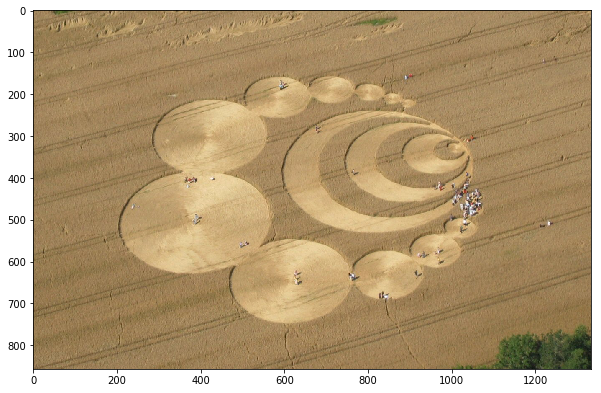

In [153]:
plt.imshow(img)

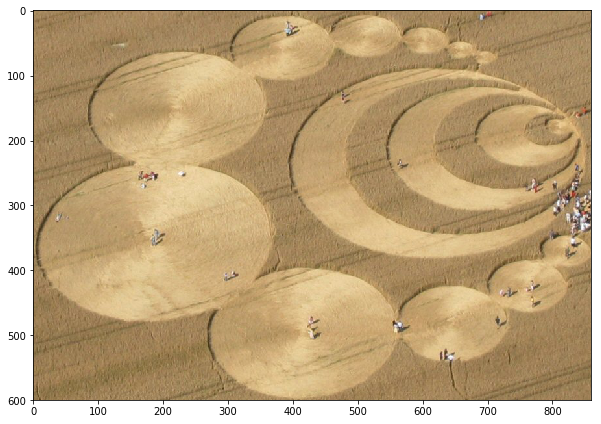

In [154]:
np.shape(img)
cropi = img[150:750, 200:1060,:]
plt.imshow(cropi)
img = cropi

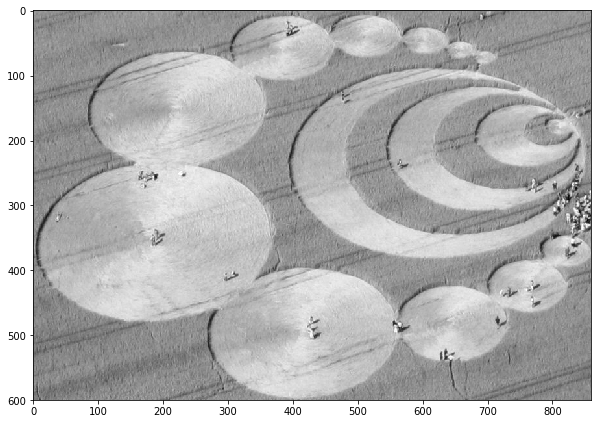

In [155]:
ch0 = img[:,:,0]
cm = plt.cm.get_cmap("gray")
plt.imshow(ch0, cmap=cm)

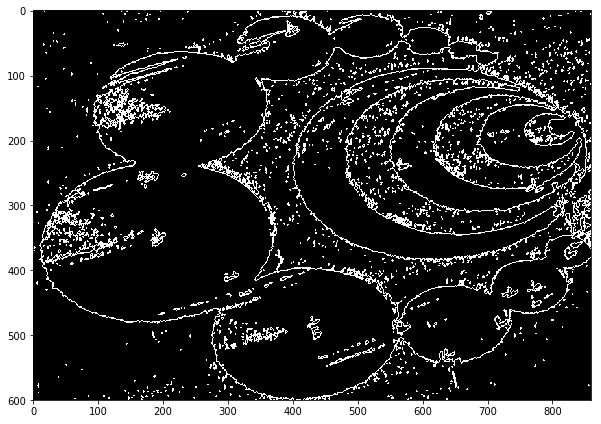

In [156]:
lap = scipy.ndimage.laplace(ab)
plt.imshow(lap, cmap=cm)

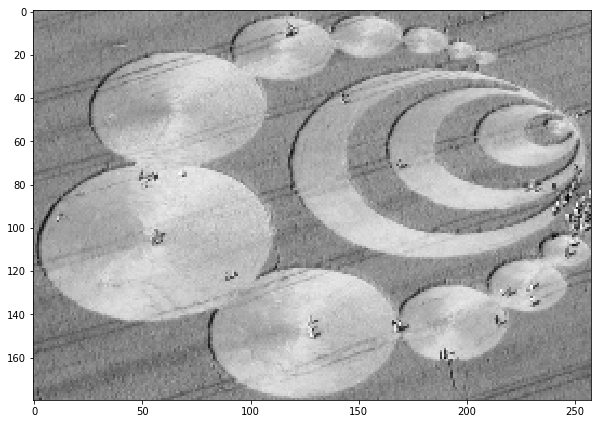

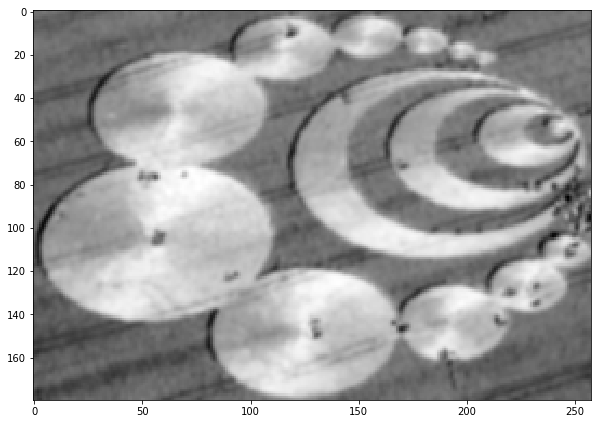

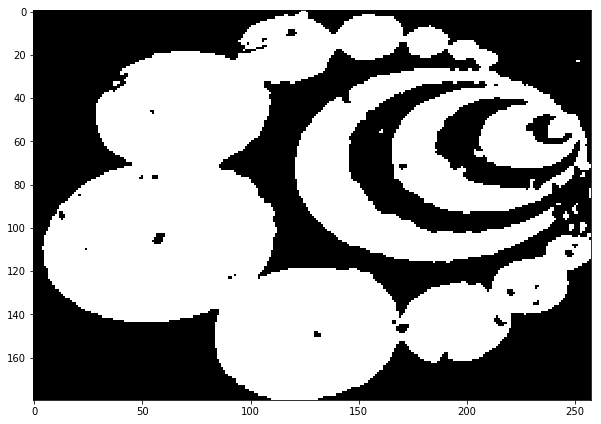

In [157]:
z = scipy.ndimage.zoom(ch0, 0.3 )
f = scipy.ndimage.gaussian_filter(z, sigma=1)
c = np.greater( f, 0.68 )
plt.imshow(z, cmap=cm)
plt.show()
plt.imshow(f, cmap=cm)
plt.show()
plt.imshow(c, cmap=cm)


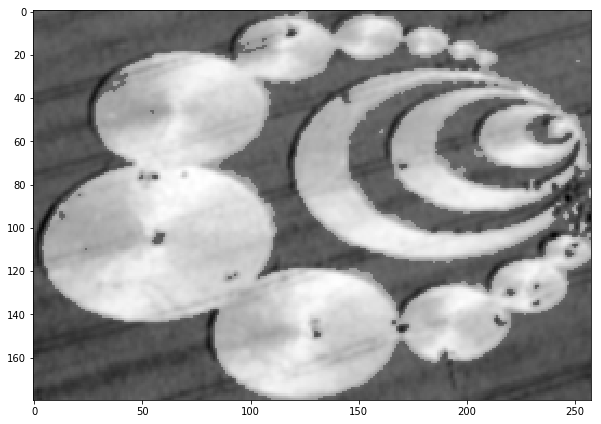

In [158]:
b = 0.9
r = f * b + c * ( 1 - b )
plt.imshow(r, cmap=cm)

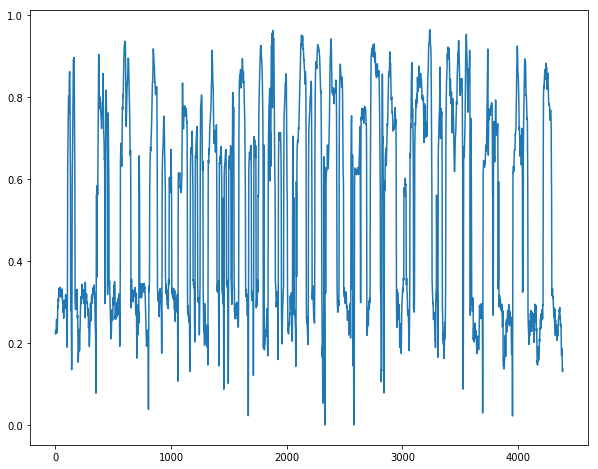

In [174]:
slc = []
for q in np.linspace( 5, 165, 16 + 1 ):
    slc.append(r[int(q), :])
cropsliceH = np.clip( np.concatenate(slc) * 1.9 - 0.8, 0, 1 )
plt.plot(cropsliceH)
    

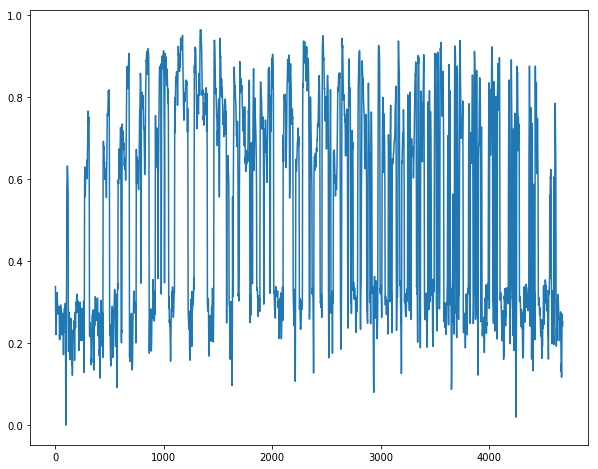

In [175]:
slc = []
for q in np.linspace( 5, 255, 25 + 1 ):
    slc.append(r[:, int(q)])
cropsliceV = np.clip( np.concatenate(slc) * 1.9 - 0.8, 0, 1 )
plt.plot(cropsliceV)
    

In [176]:
[ len(cropsliceV), len(cropsliceH)]

[4680, 4386]

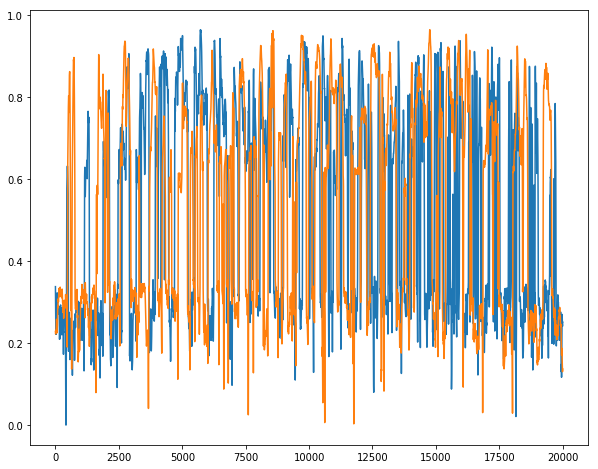

In [182]:
def in5(v):
    xp = np.linspace(0,len(v)-1, len(v))
    r = np.linspace(0, len(v)-1, 20000)
    i = np.clip( np.interp(r, xp, v), 0, 1 )
    return i

v5 = in5(cropsliceV)
h5 = in5( cropsliceH)
plt.plot(v5)
plt.plot(h5)

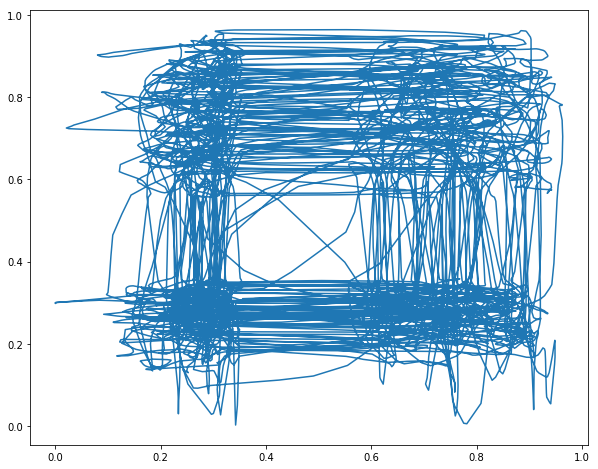

In [183]:
plt.plot(v5, h5)

In [184]:
# OK so lets write some midi!
from midiutil import MIDIFile

track    = 0
time     = 0    # In beats
channel  = 0
tempo    = 120   # In BPM

mf = MIDIFile(1)  # One track, defaults to format 1 (tempo track is created
                      # automatically)
mf.addTempo(track, time, tempo)

# OK so we have 5k points. If I am at 120bpm and I want 2 minutes that means I have 240
# beats. So CC per beat is 5k/240. Lets may it easier and do 250 beats. So
ccsperbeat = len(v5)/250
dt = 1.0 / ccsperbeat
for i in range(len(v5)):
    v = int( v5[i] * 127 )
    h = int( h5[i] * 127 )
    et = i * dt
    mf.addControllerEvent( track, channel, et, 41, v )
    mf.addControllerEvent( track, channel, et, 42, h )

with open("crop-cc.mid", "wb") as output_file:
    mf.writeFile(output_file)